# Visualising different normalisation

In [1]:
import claud_ex
import utils
import video_dataset as vd

In [2]:
sample = './media/69241.mp4'
frames = utils.load_rgb_frames_from_video(sample, 0, 0, all=True)
print(frames.shape)

torch.Size([64, 3, 256, 256])


In [3]:
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F
import random
import numpy as np

## Base 

In [4]:
base_mean = [0.43216, 0.394666, 0.37645]
base_std = [0.22803, 0.22145, 0.216989]
permute_fin = lambda x: x.permute(1,0,2,3) #not use for visualising
base_transform = transforms.Compose([
  transforms.Lambda(lambda x: vd.correct_num_frames(x, 16)),
  transforms.Lambda(lambda x: x.float() / 255.0),
  transforms.Lambda(lambda x: F.interpolate(x, size=(112, 112), 
                    mode='bilinear', align_corners=False)),
])
    

### Visualise no transformation

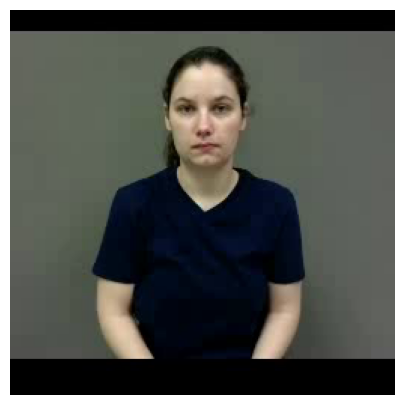

In [5]:
utils.visualise_frames(frames, 1, adapt=True)

### Visualise base transform

In [6]:
based_frames = base_transform(frames)
print(based_frames.shape)

torch.Size([16, 3, 112, 112])


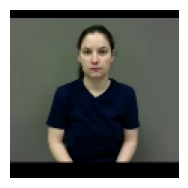

In [7]:
utils.visualise_frames(based_frames, 1, adapt=True)

### with normalisation

In [8]:
base_norm = transforms.Compose([
  base_transform,
  transforms.Lambda(lambda x: vd.normalise(x, mean=base_mean, std=base_std))
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.3341925].


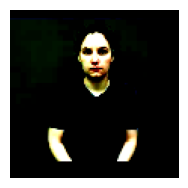

In [14]:
based_normed = base_norm(frames)
utils.visualise_frames(based_normed, 1, adapt=True)

## Random normalisation

In [9]:
augment_prob=0.5
rand_norm_aug = claud_ex.RandomNormalizationAugmentation(
  base_mean=base_mean,
  base_std=base_std,
  mean_var=0.05,
  std_var=0.03,
  prob=augment_prob
)

In [16]:


base_rand_norm = transforms.Compose([
  base_transform,
  transforms.Lambda(rand_norm_aug)
])

### visualise random normalisation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.3341925].


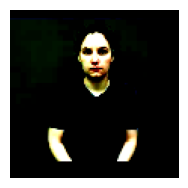

In [35]:
based_rand_normed = base_rand_norm(frames)
utils.visualise_frames(based_rand_normed, 1, adapt=True)

## Adaptive normalisation

In [11]:

base_mean = base_mean.clone().detach().float()
base_std = base_std.clone().detach().float()
print(f'base mean: {base_mean}')
print(f'base std: {base_std}')


video_mean = frames.float().mean(dim=[0,2,3])
video_std = frames.float().std(dim=[0,2,3])

video_mean = video_mean.clone().detach().float()
video_std = video_std.clone().detach().float()
print(f'Video mean: {video_mean}')
print(f'Video std: {video_std}')
adm = (1-0.3) * base_mean + 0.3 * video_mean
ads = (1 - 0.3) * base_std + 0.3 * video_std
print(f'adaptive mean: {adm}')
print(f'adaptive std: {ads}')


AttributeError: 'list' object has no attribute 'clone'